In [1]:
from IPython.core.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os

print(os.getpid())
%cd ../

9229
/media/work/docs/codes/c++/QSVT_framework/simulations


In [2]:
import pylib.measurement as mse
import pylib.mix as mix

In [42]:
path_results = "/media/work/docs/codes/c++/QSVT_framework/simulations/tests/test_AE_mq/"
# name_file = "AESQ"
# name_file = "AE2Q"
name_file = "AEMQ"

Reading the file /media/work/docs/codes/c++/QSVT_framework/simulations/tests/test_AE_mq//AEMQ_OUTPUT.hdf5...
Name of the simulation is AEMQ
Simulation has been performed  09-05-2022 15:26:21

directly calculated value: 8.950e-01
ny: 10
estimated value: 8.942e-01
analytical error (with 0.81 probability): 1.891e-03


<IPython.core.display.Javascript object>


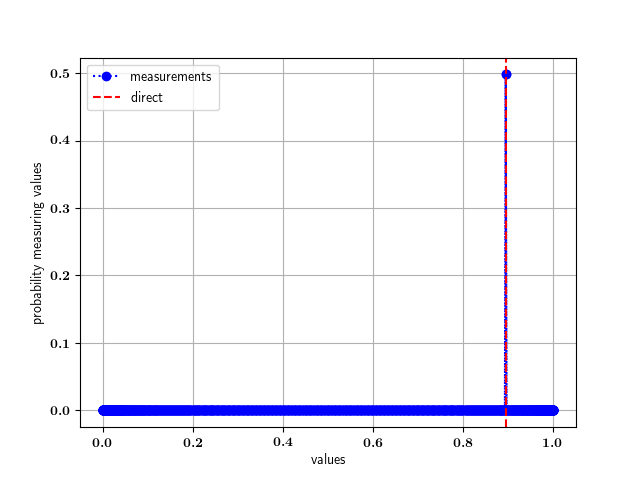

In [43]:
# ----------------------------------------------------------------------------
# --- Read quantum data after the AE ---
# ----------------------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(mse)

om = mse.MeasOracle__()
om.path_  = path_results
om.pname_ = name_file
om.open()

# --- measured probability ---
probs_meas = om.probs_

N_y_points = 1 << int(om.constants_["ny"])
int_ys = np.array(range(N_y_points))

eig_phases = np.pi * int_ys / N_y_points
values_est_array = 1. - np.sin(eig_phases)**2

id_max_qc = np.where(probs_meas == np.max(probs_meas))[0][0]
value_est = values_est_array[id_max_qc]

# --- direct calculation of the integrated value ---
# om.set_work_states(id_input_state = 0)
# ampls_state = om.get_var_x({"m": 1}, "j")
value_direct = np.sin(om.constants_["th_pr_1"]/2)**2
if name_file == "AEMQ":
#     value_direct = 1-(0.945**2 + 0.143**2)
#     value_direct = 0.143**2 + 0.292**2
    value_direct = 0.945**2 + 0.044**2
    

# --- analytical error ---
pr_ref = np.sum(np.abs(value_direct)**2)
analytical_abs_error = 2*np.pi*np.sqrt(value_direct*(1-value_direct))/N_y_points + np.pi**2/(N_y_points**2)

# --- form the histogram ---
print()
print("directly calculated value: {:0.3e}".format(value_direct))
print("ny: {:d}".format(int(om.constants_["ny"])))
print("estimated value: {:0.3e}".format(value_est))
print("analytical error (with 0.81 probability): {:0.3e}".format(analytical_abs_error))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(
    values_est_array, probs_meas, color='b', marker="o", linestyle = ':', label = "measurements"
)
ax.axvline(
    x=value_direct, color='red', linestyle = '--', label = "direct"
)
plt.xlabel("values")
plt.ylabel("probability measuring values")
ax.legend()
plt.grid(True)
# plt.xlim(0., 200.)
plt.show()

In [37]:
mix.reload_module(mix)
mix.reload_module(mse)

om = mse.MeasOracle__()
om.path_  = path_results
om.pname_ = name_file
om.open()
om.set_work_states(id_input_state = 0)
ampls_state = om.get_var_x({"m": 0}, "j")
print()
ampls_state

Reading the file /media/work/docs/codes/c++/QSVT_framework/simulations/tests/test_AE_mq//AEMQ_OUTPUT.hdf5...
Name of the simulation is AEMQ
Simulation has been performed  09-05-2022 15:22:54



array([0.945+0.j, 0.143+0.j, 0.292+0.j, 0.044+0.j])